### 0. Computer vision libraries in PyTroch


* `torchvision` - base domain library for PyTorch computer vision

* `torchvision.datasets` - get datasets and data loading functions for computer vision  
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use in an ML model
* `torch.utils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python Iterable over a dataset  

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvison
import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

# Import matplotlin for visualization
import matplotlib.pyplot as plt

# Check version
torch.__version__,torchvision.__version__

('2.5.0+cpu', '0.20.0+cpu')

### 1. Getting a Dataset


The dataset we'll be using FashionMNIST from torchvision.datasets -


In [ ]:
#  Setup training data
train_data = datasets.FashionMNIST(
    root = "data", # Where to download data to?
    train = True, # do we want the training dataset
    download = True, # do we want to download yes/no?
    transform = torchvision.transforms.ToTensor(), # How do we transform the data?
    target_transform = None  # how do we want to tranform the labels/targets?
)
# Setup Test Data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.72MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Check the shape of our image

print(f'Image Shape : {image.shape} , -> [color_channels,heights,width]')
print(f'Image label : {class_names[label]}')

Image Shape : torch.Size([1, 28, 28]) , -> [color_channels,heights,width]
Image label : Ankle boot


 ### 1.2 Visualizing our data

Image shape : torch.Size([1, 28, 28])


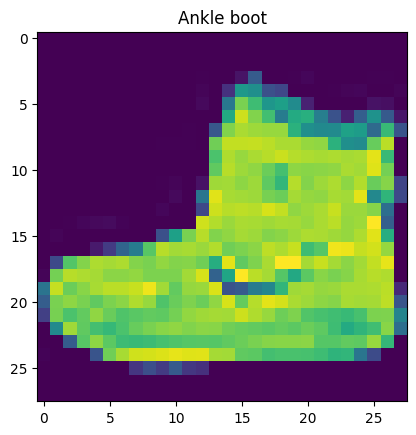

In [ ]:
import matplotlib.pyplot as plt

image,lavel = train_data[0]
print(f'Image shape : {image.shape}')
plt.imshow(image.squeeze())
plt.title(class_names[label]);

(-0.5, 27.5, 27.5, -0.5)

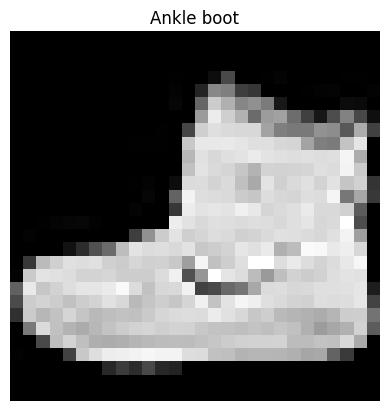

In [ ]:
plt.imshow(image.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

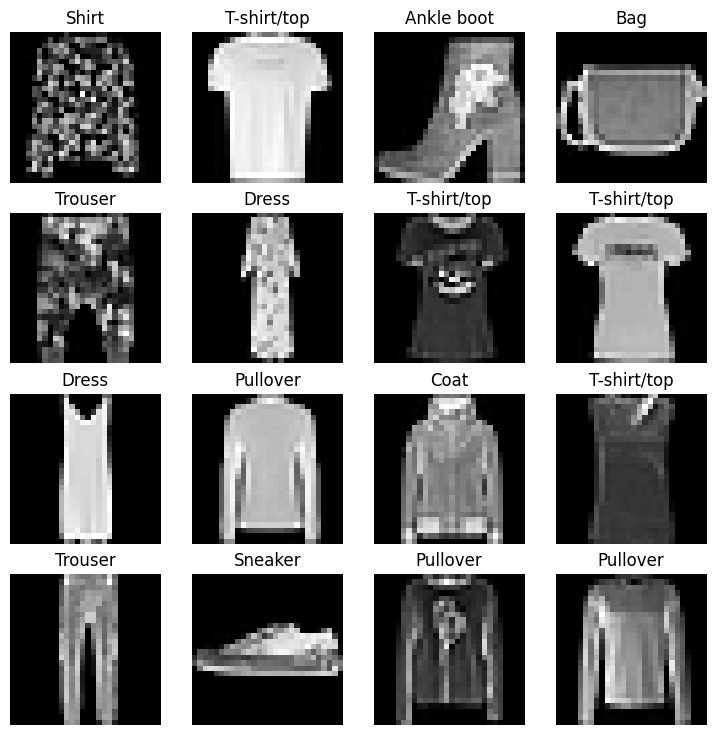

In [ ]:
# Plot more images
torch.manual_seed(2)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.


DataLoader turns our datasets into a Python iterable


More Specifically, we want to turn our data into batches (or mini batches)

Why would we do this?
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. SO we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epochs.




In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset = train_data,
                            batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c3f24819a80>,
 <torch.utils.data.dataloader.DataLoader at 0x7c3f248189a0>)

In [ ]:
# Let's check out what we've created

print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f' Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f' Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7c3f24819a80>, <torch.utils.data.dataloader.DataLoader object at 0x7c3f248189a0>)
 Length of train_dataloader: 1875 batches of 32...
 Length of train_dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
label L 5, label size : torch.Size([])


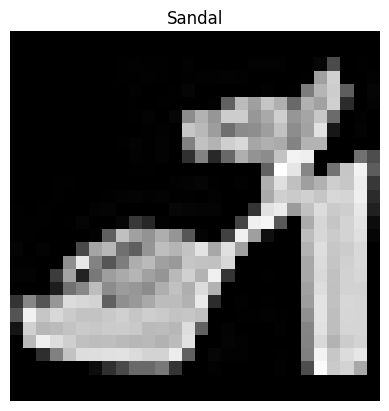

In [ ]:
# Show a sample
# torch.manual_seed(42)
rand_idx = torch.randint(0,len(train_features_batch), size = [1]).item()
img, label = train_features_batch[rand_idx],train_labels_batch[rand_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Image size : {img.shape}')
print(f"label L {label}, label size : {label.shape}")

### 3. Model 0: Build a baseline model

When starting to bulild a series of machine learning modelling experiment, it's best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

In orther words: start simply and add complexity when necessary

In [ ]:
#Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f'Shape before flattenning: {x.shape} -> [color channels, height, width]' )
print(f'Shape after flattening: {output.shape} -> [colour channels, height * width]')

Shape before flattenning: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [colour channels, height * width]


In [ ]:
from torch import nn

class FashionMNISTMOdelV0(nn.Module):
  def __init__(self,
                input_shape: int,
                hidden_units : int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features  = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTMOdelV0(
          input_shape = 784, # This is 28*28
          hidden_units = 10, # How many units in the hidden layer
          output_shape = len(class_names)

)

In [ ]:
dummy_x = torch.rand([1,1,28,28])

In [ ]:
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluaion metrics

* Loss function - since we're working with multi-class data, our loss fucnction will be nn.CossEntropyLoss()

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we're working on a classificaiton problem, let's use accuracy as our evaluation metric



In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download...')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')

  with open('helper_functions.py','wb') as f:
    f.write(request.content)



In [ ]:
# Import accuracy metric

from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr= 0.1)


## 3.2 Crating a function to time our experiments

Two of the main things you'll often want to trak are:
1. Model's proformance (loss and accuracy values etc)
2. How fast it runs  

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    '''Print difference between start and end time'''
    print(f"Train time on {device}: {end - start:.3f} seconds")
    return end - start

In [ ]:
start_time =  timer()
# Some code....
end_time = timer()
print(print_train_time(start = start_time,
                      end = end_time ,
                      device = 'CPU'))

Train time on CPU: 0.000 seconds
2.5415999971301062e-05


### 3.3 Creating a training loop and training a model on a batches of data

1.  Loop through epochs.
2. Loop through training batches, perform training steps, calcualte the train loss *per batch*
3. Loop through testing batches, perform testing steps, calcuate the test loss *per batch*
4. Print of what's happening.
5. Time it all (for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n--------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calcuate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss+= loss # accumulate trian loss

    #3. Optimizer zero grad
    optimizer.zero_grad()


    #4 Loss backward
    loss.backward()

    #5 Optimizer step
    optimizer.step()


    # Print out what's happeninig
    if batch % 400 == 0:
      print(f'Looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples.')


  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ## Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forward Pass
      test_pred = model_0(X_test)


      #2.  Caulculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      #3. Calcualte accuracy
      test_acc += accuracy_fn(y_true = y_test,y_pred = test_pred.argmax(dim =1))

    # Calcuate the test loss average per batch
    test_loss /= len(test_dataloader)


    # Caucalte the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\nTrain loss : {train_loss:.4f} | Test loss : {test_loss:.4f}, Test Acc {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start =train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.5904 | Test loss : 0.5095, Test Acc 82.0387
Epoch: 1 
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4763 | Test loss : 0.4799, Test Acc 83.1969
Epoch: 2 
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4550 | Test loss : 0.4766, Test Acc 83.4265
Train time on cpu: 28.789 seconds


## 4 . Make predictions and get Model 0 results


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  '''Returns a dictionary containing the results of  model predicting on data_loader.'''
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Makw predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim =1))
    # Scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name' : model.__class__.__name__, # only works when model wad created with a class
          'model_loss' : loss.item(),
          'model_acc': acc}

# Calcuate model 0 results on test data
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results




  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic- code (for using a GPU if there is one)


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device - agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else 'cpu'

 ### 6. Model 1. Building a model with non-linearity

 
 

In [ ]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten the input
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # Linear layer 1
            nn.ReLU(),  # ReLU activation after the first linear layer
            nn.Linear(in_features=hidden_units, out_features=output_shape),  # Linear layer 2
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device) # Send to the GPU if it's availabe
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation , metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr = 0.1)



### 6.2 Functionizing training and evaluating/testing loops

Let's create a function for:
* training loop - `train_step()`

* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  '''Returns a dictionary containing the results of  model predicting on data_loader.'''
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our Data Device agnostic
      X,y = X.to(device),y.to(device)
      #Makw predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim =1))
    # Scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name' : model.__class__.__name__, # only works when model wad created with a class
          'model_loss' : loss.item(),
          'model_acc': acc}






In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 29.082 seconds


> **Note** Sometime, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

> Why is this?
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute offered by the GPU
>2. The hardware you're using has a better CPU in terms compute capability than the GPU.
> For more on how to make you model compute faster https://horace.io/brrr_intro.html

In [ ]:
model_0_results

{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

28.789052323999954

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2. Building a Convolutional Neural Network (CNN)

>CNN's are also known as ConvoNEts.


>CNN's are known for their capibilities to find patterns in visual data.

To find what's happenning inside a CNN, see this website https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

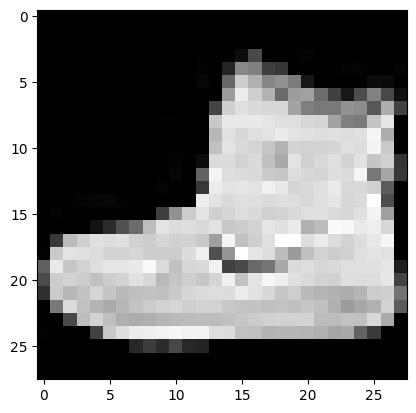

In [ ]:
plt.imshow(image.squeeze(),cmap = 'gray')

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Create a single con2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3,3),
                       stride = 1,
                       padding = 1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
m = model_2(rand_image_tensor.unsqueeze(0).to(device))

### 7.2. Stepping through `nn.MaxPool2d()`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueeze dimension {test_image.unsqueeze(0).shape}')


# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through convlayer(): {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_iamge_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through maxpool() and conv layer() {test_iamge_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension torch.Size([1, 3, 64, 64])
Shape after going through convlayer(): torch.Size([10, 64, 64])
Shape after going through maxpool() and conv layer() torch.Size([10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a ramdom tensor with similar number of dimensions to our images
random_tensor = torch.randn(size = (1,1,2,2)) #Batch_size, colour_channels, height, Weidth
print(f'\nRandom tensor:\n{random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')


# Create a max pool layer
max_pool_layer =  nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f'\nMax Pool tensor:\n {max_pool_tensor}')
print(f'Max Pool tesnor shape {max_pool_tensor.shape}')



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max Pool tensor:
 tensor([[[[0.3367]]]])
Max Pool tesnor shape torch.Size([1, 1, 1, 1])


###7.3  Setup a loss function and optimizer for `model_2`



In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

## 7.4 Training and testing `model_2` using our training and test function

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59294 | Train accuracy: 78.48%
Test loss: 0.39000 | Test accuracy: 85.89%

Epoch: 1
---------
Train loss: 0.36067 | Train accuracy: 86.97%
Test loss: 0.35657 | Test accuracy: 86.83%

Epoch: 2
---------
Train loss: 0.32359 | Train accuracy: 88.27%
Test loss: 0.31793 | Test accuracy: 88.49%

Train time on cpu: 65.405 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31793299317359924,
 'model_acc': 88.48841853035144}

In [ ]:
model_0_results


{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

### 8. Comaring results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results
                                ,model_1_results
                                ,model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTMOdelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.317933,88.488419


In [ ]:
## Add training time to results comprasion

compare_results["training_time"] = [total_train_time_model_0,
                                       total_train_time_model_1,
                                       total_train_time_model_2]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTMOdelV0,0.476639,83.426518,28.789052
1,FashionMNISTModelV1,0.685001,75.019968,29.082432
2,FashionMNISTModelV2,0.317933,88.488419,65.405471


Text(0, 0.5, 'model')

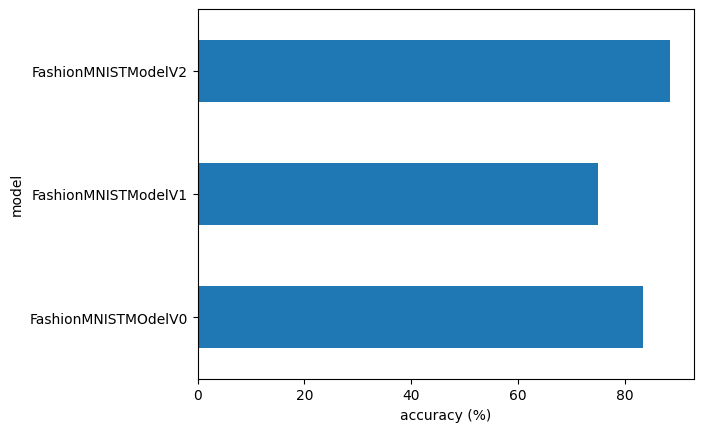

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = 'barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

### 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim = 0).to(device)


      # Forward pass (model output raw logits)
      pred_logits = model(sample)

      # Get the prediction probability (logits -> predict probability)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim = 0)


      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)




In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

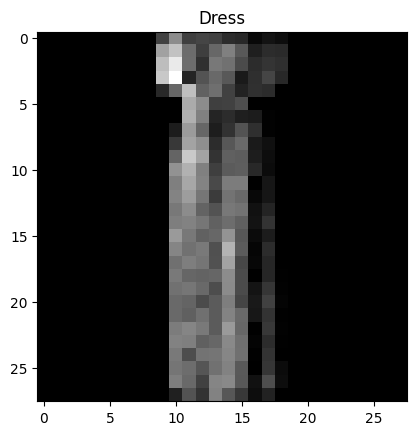

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions

pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[0]

tensor([2.9298e-03, 1.8755e-02, 1.0356e-04, 9.6451e-01, 9.7249e-03, 3.1379e-05,
        2.4535e-03, 4.2209e-04, 1.6806e-04, 9.0489e-04])

In [ ]:
# Conver prediction probabilities to labels
pred_classes = pred_probs.argmax(dim =1)
pred_classes

tensor([3, 1, 6, 9, 7, 3, 4, 8, 5])

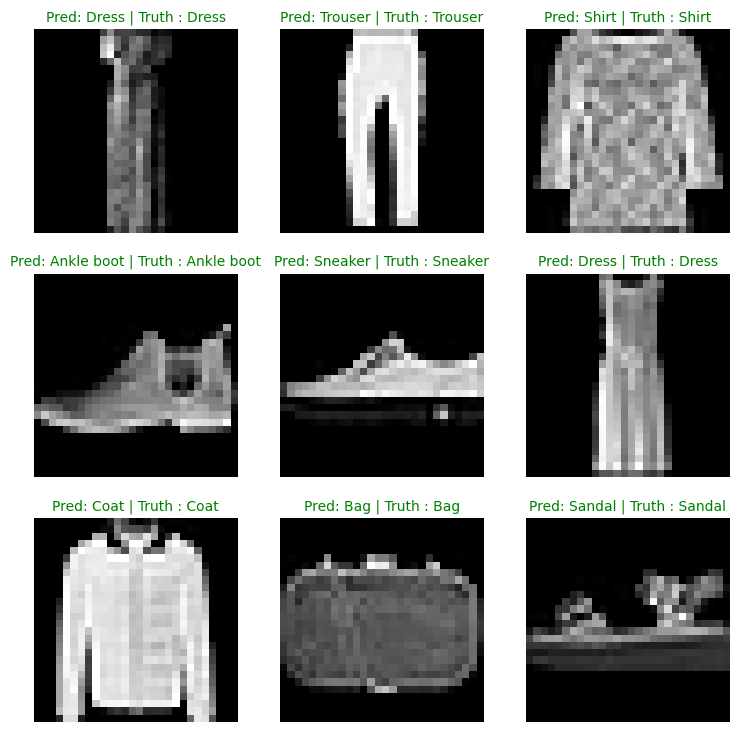

In [ ]:
# Plot predictions

plt.figure(figsize  = (9,9))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
  # Creat subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap = 'gray')

  # Find the prediction (in test from, e.g. "Sadel")
  pred_label = class_names[pred_classes[i]]

  # Get the true label  (in test form)
  truth_label  = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f'Pred: {pred_label} | Truth : {truth_label}'


  # Check for equality between pred and trugh and change color of title test
  if pred_label == truth_label:
    plt.title(title_text,fontsize = 10,c = 'g') # Green if the prediction is correct

  else:
    plt.title(title_text,fontsize = 10,c = 'r') # Red if the prediction is incorrect

  plt.axis(False)


### 10. Making an confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually :
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

1. Make predictions with our trained model on the test dataset
2. Make confusion matrix `torchmatrics.ConfusionMatrix`
https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html

3. Plot the confusioon matrix using `mixtend.plotting.plot_confusion_matrix()`
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
4.


In [ ]:
# Imort tqdm.auto

from tqdm.auto import tqdm

#1 . Make predictions with trained model

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc = "Making predictions..."):
    # Send the data. and targets to target devcie
    X,y = X.to(device),y.to(device)
    #Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim = 0).argmax(dim =1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics ,mlxtend
  print(f'mlxtend version : {mlxtend.__version__}')
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics ,mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version : 0.23.2


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.2


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

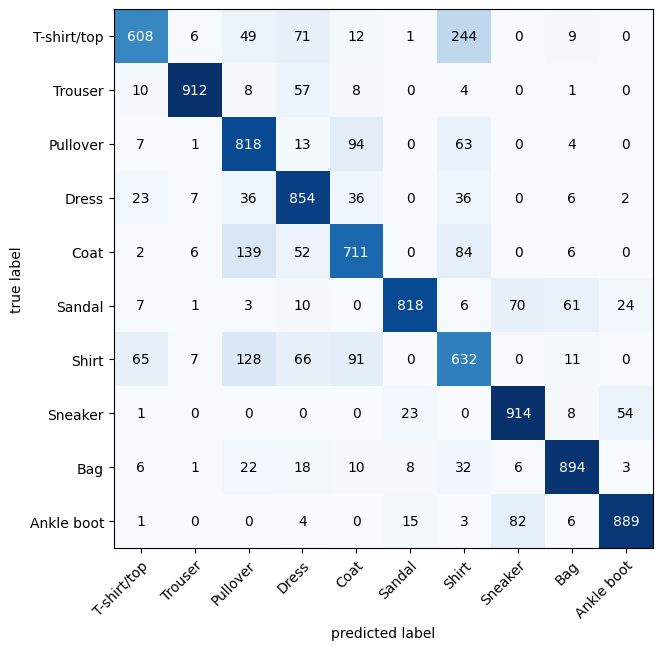

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# 2. Setup computer instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names),task= 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. Plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10,7)
)

## 11. Save and Load best performing model

In [ ]:
from pathlib import Path

# Create a mdeol dictory path
MODEL_PATH = Path ("model")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

# Save the model state dict
print(f'Saving model to : {MODEL_SAVE_PATH}')
torch.save(obj = model_2.state_dict(),f = MODEL_SAVE_PATH)



Saving model to : model/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance of
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                   hidden_units = 10,
                                   output_shape = len(class_names))
# Load in the save satate_dict( )
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send model to the target device
loaded_model_2.to(device)


<ipython-input-90-d991cc85ee93>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31793299317359924,
 'model_acc': 88.48841853035144}

In [ ]:
# Evalue the loaded model

torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31793299317359924,
 'model_acc': 88.48841853035144}

In [ ]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol = 1e-02)

tensor(True)